# Especificação de Projeto

A PyCoders Ltda. não para de expandir seus negócios e está iniciando sua
presença no comércio têxtil, fechando uma parceria com a Van Arsdel para
obter dados e trazer resultados sobre suas vendas. 
Porém, para trazer
escalabilidade, foi definido que os dados serão armazenados em um banco
de dados relacional na Amazon Web Services. 
Porém, por ser uma empresa
pequena, não existe no corpo de funcionários Engenheiros de Dados. 
Assim,
será sua responsabilidade estruturar o banco de dado para armazenar
informações relacionadas a este cenário. 
Dessa forma, pede-se que seja
elaborado todo o fluxo, desde a criação do diagrama E-R até a execução de
algumas queries de teste, passando pela inserção dos dados

##### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import psycopg2 
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import pandas as pd

##### CONEXÃO DO BANCO DE DADOS

In [48]:
connection = psycopg2.connect(user = 'postgres', password = 'postgres', host = 'cinza.cp6xfa6zogly.us-east-2.rds.amazonaws.com', port = '5432')

cursor = connection.cursor()
print(connection.get_dsn_parameters(), "\n")

cursor.execute('SELECT version();')
record = cursor.fetchone()
print('You are connected to', record, '\n')

{'user': 'postgres', 'dbname': 'postgres', 'host': 'cinza.cp6xfa6zogly.us-east-2.rds.amazonaws.com', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to ('PostgreSQL 11.5 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',) 



##### CRIAÇÃO DO BANCO DE DADOS

In [4]:
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT);
    
name_Database = "projeto_mod5";
sqlCreateDatabase = "create database "+name_Database+";"
    
cursor.execute(sqlCreateDatabase)

DuplicateDatabase: database "projeto_mod5" already exists


In [2]:
connection = psycopg2.connect(user = 'postgres', password = 'postgres', database = "projeto_mod5", 
                              host = 'cinza.cp6xfa6zogly.us-east-2.rds.amazonaws.com', port = '5432')
cursor = connection.cursor()

# Milestone #1


### Criar o diagrama E-R e o modelo relacional do banco de dados.

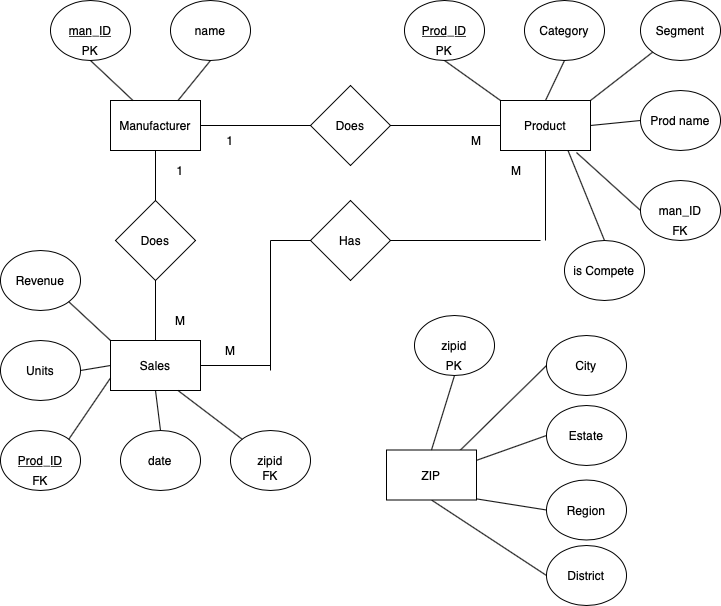

In [3]:
from IPython.display import Image
Image(filename='Diagrama_ER.png')

# Milestone #2

### Criar as queries para criação das tabelas, definidos no passo anterior, e popular essas tabelas.

In [161]:
sql = 'CREATE TABLE manufacturer (manufacturerid INT NOT NULL PRIMARY KEY, manufacturer VARCHAR(10))'
cursor.execute(sql)
connection.commit()

In [324]:
sql = 'CREATE TABLE sales (id INT, productidfk INT NOT NULL, date DATE, zipfk INT NOT NULL, units INT, revenue DOUBLE PRECISION, FOREIGN KEY (productidfk) REFERENCES product(productid), FOREIGN KEY (zipfk) REFERENCES zip (zipid))'
cursor.execute(sql)
connection.commit()

In [162]:
sql = 'CREATE TABLE product (category VARCHAR(20), segment VARCHAR(30), product VARCHAR(30), productid INT NOT NULL PRIMARY KEY, iscompetehide VARCHAR(1), manufactureridfk INT NOT NULL, FOREIGN KEY (manufactureridfk) REFERENCES manufacturer (manufacturerid))'
cursor.execute(sql)

In [323]:
sql = 'CREATE TABLE zip (id INT, zipid INT NOT NULL PRIMARY KEY, city VARCHAR (30), state VARCHAR(2), region VARCHAR(10), district VARCHAR(20))'
cursor.execute(sql)

### Tratando os dados dos arquivos .csv

In [198]:
df_man = pd.read_csv("fabricante.csv")
df_sales = pd.read_csv("vendas.csv")
df_zip = pd.read_csv("geo.csv")
df_product = pd.read_csv("produto.csv")

In [304]:
df_zip['district'] = df_zip['district'].astype('str')
df_zip.city = df_zip.city.str.split(",").str[0]
del df_zip['Unnamed: 0']
df_zip.to_csv('geo.csv')

In [171]:
df_man.drop("Unnamed: 0", inplace = True, axis = 1)

In [296]:
df_sales['date'] = pd.to_datetime(df_sales['date'],format ='%d/%m/%Y')
df_sales["revenue"] = df_sales["revenue"].str.replace("$", "")
df_sales["revenue"] = df_sales["revenue"].str.replace(",", "")
df_sales["revenue"] = pd.to_numeric(df_sales.revenue)
df_sales = df_sales.drop("Unnamed: 0.1", inplace = True, axis = 1)
df_sales.date = df_sales.date.str.split(" ").str[0]

In [177]:
df_man['manufacturer'] = df_man['manufacturer'].astype('str')
df_man.to_csv('fabricante.csv')

### Populando as tabelas criadas

#### Para subir os dados nas tabelas, rodamos o código abaixo no PowerShell:

psql -h "cinza.cp6xfa6zogly.us-east-2.rds.amazonaws.com" -U postgres -d projeto_mod5 -c "\copy sales FROM 'C:/vendas.csv' WITH (FORMAT csv,header true, delimiter ',');"

psql -h "cinza.cp6xfa6zogly.us-east-2.rds.amazonaws.com" -U postgres -d projeto_mod5 -c "\copy zip FROM 'C:/geo.csv' WITH (FORMAT csv,header true, delimiter ',');"

### Verificando os dados nas tabelas

In [4]:
sql = "SELECT * FROM sales LIMIT 15;"
print(pd.read_sql(sql, connection))

    id  productidfk        date  zipfk  units    revenue
0    0           88  2000-02-15  95605     92  926780.40
1    1         2263  2008-11-12  33178     44  177380.28
2    2         2262  2008-11-12  33178     44  177380.28
3    3          764  2004-07-27  27522     40  146134.80
4    4          763  2004-07-27  27522     40  146134.80
5    5          862  2003-04-04  61790     40   85654.80
6    6         2091  2005-11-25  37214     36   71419.32
7    7         1228  2002-07-21  78752     33   51954.21
8    8          103  2003-01-02  95605     31  334548.90
9    9          495  2002-11-10  57701     31  312480.00
10  10         2090  2007-11-11  44460     30  128501.10
11  11         1006  2006-12-27  46222     30   34001.10
12  12         2090  2008-11-28  44460     30  130391.10
13  13          415  2009-04-17  33306     29  310571.73
14  14          415  2014-04-11  32174     29  333409.23


In [5]:
sql = "SELECT * FROM zip LIMIT 15;"
print(pd.read_sql(sql, connection))

    id  zipid        city state region      district
0    0  15201  Pittsburgh    PA   East  District #13
1    1  15202  Pittsburgh    PA   East  District #13
2    2  15203  Pittsburgh    PA   East  District #13
3    3  15204  Pittsburgh    PA   East  District #13
4    4  15205  Pittsburgh    PA   East  District #13
5    5  15206  Pittsburgh    PA   East  District #13
6    6  15207  Pittsburgh    PA   East  District #13
7    7  15208  Pittsburgh    PA   East  District #13
8    8  15209  Pittsburgh    PA   East  District #13
9    9  15210  Pittsburgh    PA   East  District #13
10  10  15211  Pittsburgh    PA   East  District #13
11  11  15212  Pittsburgh    PA   East  District #13
12  12  15213  Pittsburgh    PA   East  District #13
13  13  15214  Pittsburgh    PA   East  District #13
14  14  15215  Pittsburgh    PA   East  District #13


In [6]:
sql = "SELECT * FROM manufacturer;"
print(pd.read_sql(sql, connection))

    manufacturerid manufacturer
0                6          Leo
1               12       Quibus
2                1        Abbas
3                2       Aliqui
4               14     Victoria
5                8       Natura
6                4       Currus
7                9        Palma
8               13       Salvus
9                5         Fama
10              11        Pomum
11              10        Pirum
12               3        Barba
13               7    VanArsdel


In [8]:
sql = "SELECT * FROM product LIMIT 15;"
print(pd.read_sql(sql, connection))

   category      segment        product  productid iscompetehide  \
0     Urban  Convenience  Maximus UC-01        536             N   
1     Urban  Convenience  Maximus UC-02        537             N   
2     Urban  Convenience  Maximus UC-03        538             N   
3     Urban  Convenience  Maximus UC-04        539             N   
4     Urban  Convenience  Maximus UC-05        540             N   
5     Urban  Convenience  Maximus UC-06        541             N   
6     Urban  Convenience  Maximus UC-07        542             N   
7     Urban  Convenience  Maximus UC-08        543             N   
8     Urban  Convenience  Maximus UC-09        544             N   
9     Urban  Convenience  Maximus UC-10        545             N   
10    Urban  Convenience  Maximus UC-11        546             N   
11    Urban  Convenience  Maximus UC-12        547             N   
12    Urban  Convenience  Maximus UC-13        548             N   
13    Urban  Convenience  Maximus UC-14        5

# Milestone #3


### Elaborar as queries para responder aos questionamentos.

## Questionamento #1
#### Quantos itens foram vendidos no total?

In [3]:
def total_sales():
    sql1 = 'SELECT SUM(units) as Soma FROM sales;'
    df = pd.read_sql(sql1, connection)
    return df

In [4]:
total_sales()

,soma
0,1299599


## Questionamento #2
#### Quais foram as cidades fizeram mais vendas?

In [5]:
def city_more_sales():
    sql2 = '''SELECT SUM(a.units) AS units, a.zipfk AS zipfk, b.city AS city 
    FROM sales a 
    LEFT JOIN zip b ON a.zipfk = b.zipid 
    GROUP BY (a.zipfk, b.city) 
    ORDER BY units DESC;'''
    df = pd.read_sql(sql2, connection)
    return df.head()

In [6]:
city_more_sales()

,units,zipfk,city
0,949,93065,Simi Valley
1,887,92345,Hesperia
2,849,92592,Temecula
3,843,90501,Torrance
4,755,92562,Murrieta


## Questionamento #3
#### Qual o mês com a maior receita de vendas da Van Arsdel?

In [7]:
def best_sales_month():
    sql3 = """SELECT 
    m.manufacturer,
    SUM(s.revenue) AS Revenue_Month, EXTRACT(MONTH from s.date) AS Month
    FROM
    product p
    INNER JOIN manufacturer m ON m.manufacturerid = p.manufactureridfk
    INNER JOIN sales s ON s.productidfk = p.productid  WHERE manufacturer = 'VanArsdel'
    GROUP BY (manufacturer, Month)  ORDER BY Revenue_Month DESC LIMIT 1"""
    df = pd.read_sql(sql3, connection)
    return df

In [8]:
best_sales_month()

,manufacturer,revenue_month,month
0,VanArsdel,3.538930e+08,12.0


## Questionamento #4
#### Qual a média de receita do setor por ano?

In [9]:
def avg_revenue_year():
    sql4 = 'SELECT AVG(revenue) AS Avg_revenue, EXTRACT(YEAR from date) AS Year FROM sales GROUP BY Year ORDER BY Avg_Revenue;'
    df = pd.read_sql(sql4, connection)
    return df

In [10]:
avg_revenue_year()

,avg_revenue,year
0,4566.893902,2001.0
1,4588.099752,2002.0
2,4697.194451,2003.0
3,4732.637894,2000.0
4,4763.034782,2004.0
5,4979.317691,1999.0
6,4985.126381,2005.0
7,5311.919780,2006.0
8,5669.344445,2007.0
9,5788.228927,2008.0


## Questionamento #5
#### Qual o segmento mais lucrativo para a Van Arsdel?

In [11]:
def best_segment():

    sql5 = '''SELECT SUM(s.revenue) AS Revenue, m.manufacturer AS Manufacturer, p.segment AS Segment
            FROM product p 
            INNER JOIN sales s ON p.productid = s.productidfk
            INNER JOIN manufacturer m ON m.manufacturerid = p.manufactureridfk WHERE manufacturer = 'VanArsdel'
            GROUP BY (p.segment, m.manufacturer) ORDER BY Revenue DESC LIMIT 1;'''
    df = pd.read_sql(sql5, connection)
    return df

In [12]:
best_segment()

,revenue,manufacturer,segment
0,1.687086e+09,VanArsdel,Moderation


## Questionamento #6
#### Dentro do segmento menos lucrativo, qual foi o produto que gerou mais receita?

In [13]:
def worstseg_bestprod():
    sql6 = '''SELECT p.segment AS segment, s.productidfk AS Product_ID, SUM(s.revenue) AS Revenue
            FROM sales s
            INNER JOIN product p ON p.productid = s.productidfk WHERE segment = 'Productivity' and Revenue IS NOT NULL
            GROUP BY (p.segment, s.productidfk) ORDER BY Revenue DESC LIMIT 1;'''
    df = pd.read_sql(sql6, connection)
    return df

In [14]:
worstseg_bestprod()

,segment,product_id,revenue
0,Productivity,733,2.922595e+07


## Questionamento #7
#### Qual o pior concorrente da Van Arsdel? Por quê?

In [15]:
def worst_competitor():
    sql7 = ''' SELECT SUM(s.revenue) AS Revenue, m.manufacturer AS Manufacturer FROM sales s
                INNER JOIN product p ON p.productid = s.productidfk
                INNER JOIN manufacturer m ON m.manufacturerid = p.manufactureridfk
                GROUP BY(m.manufacturer) ORDER BY Revenue ASC LIMIT 1;'''
    df = pd.read_sql(sql7, connection)
    return df

In [16]:
worst_competitor()

,revenue,manufacturer
0,4586284.08,Salvus


## Questionamento #8
#### Do estado com maior número de cidade distintas, qual foi a cidade que mais fez receita?

In [17]:
def state_bestrevenue():
    sql8 = '''SELECT SUM(s.revenue) AS revenue, z.city AS city 
        FROM sales s
        INNER JOIN zip z ON s.zipfk = z.zipid 
        WHERE state in (SELECT state FROM zip GROUP BY state ORDER BY COUNT(city) DESC LIMIT 1)
        GROUP BY z.city 
        ORDER BY revenue DESC LIMIT 1;'''
    df = pd.read_sql(sql8, connection)
    return df

In [18]:
state_bestrevenue()

,revenue,city
0,3.013660e+07,San Diego
